# Módulo 10 atividade 1

Uma instituição financeira quer conhecer melhor o perfil de renda de seus novos clientes para diversos fins, por exemplo, melhor dimensionar o limite de cartões de crédito dos novos clientes, sem necessariamente solicitar olerites ou documentações que impactem na experiência do seu cliente.

Para isto, conduziu um estudo com alguns clientes, comprovando suas rendas através de olerites e outros documentos, e pretende construir um modelo preditivo para esta renda com base em algumas variáveis que já possui em seu banco de dados.

As variáveis são intuitivas - note que há uma variável 'index' que é um identificador do cliente e que em geral o ```read_csv``` do pandas coloca também uma variável sequencial.

Estes dados estão no arquivo ```previsao_de_renda.csv```. Carregue-o em um *dataframe*.

1) Avalie a estrutura de correlação das variáveis quantitativas através de um gráfico de "matriz de dispersão" e através da avaliação gráfica da matriz de correlações. Veja se você identifica algum padrão interessante ou que te faça sentido.

In [39]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib notebook

data = pd.read_csv("previsao_de_renda.csv")

In [40]:
data

,Unnamed: 0,data_ref,index,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,mau,renda
0,0,2015-01-01,8682,F,False,True,1,Assalariado,Secundário,Casado,Casa,36,3.575342,3.0,False,3369.24
1,1,2015-01-01,12830,M,True,True,0,Empresário,Secundário,Casado,Casa,42,0.860274,2.0,False,6096.14
2,2,2015-01-01,2885,M,True,True,2,Assalariado,Superior completo,Casado,Casa,31,8.065753,4.0,False,5658.98
3,3,2015-01-01,16168,F,True,False,0,Empresário,Secundário,Casado,Casa,50,1.208219,2.0,False,7246.69
4,4,2015-01-01,12438,M,False,False,0,Assalariado,Secundário,Casado,Casa,52,13.873973,2.0,False,4017.37
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,14995,2016-03-01,3678,M,True,True,1,Assalariado,Secundário,Casado,Casa,37,2.046575,3.0,False,1193.29
14996,14996,2016-03-01,3405,M,True,True,1,Servidor público,Superior completo,Casado,Estúdio,30,12.079452,3.0,False,2519.18
14997,14997,2016-03-01,7944,F,True,True,0,Assalariado,Secundário,Casado,Casa,40,2.161644,2.0,False,1586.85
14998,14998,2016-03-01,16019,F,False,True,0,Servidor público,Superior completo,Casado,Casa,47,3.295890,2.0,False,6975.39


<IPython.core.display.Javascript object>


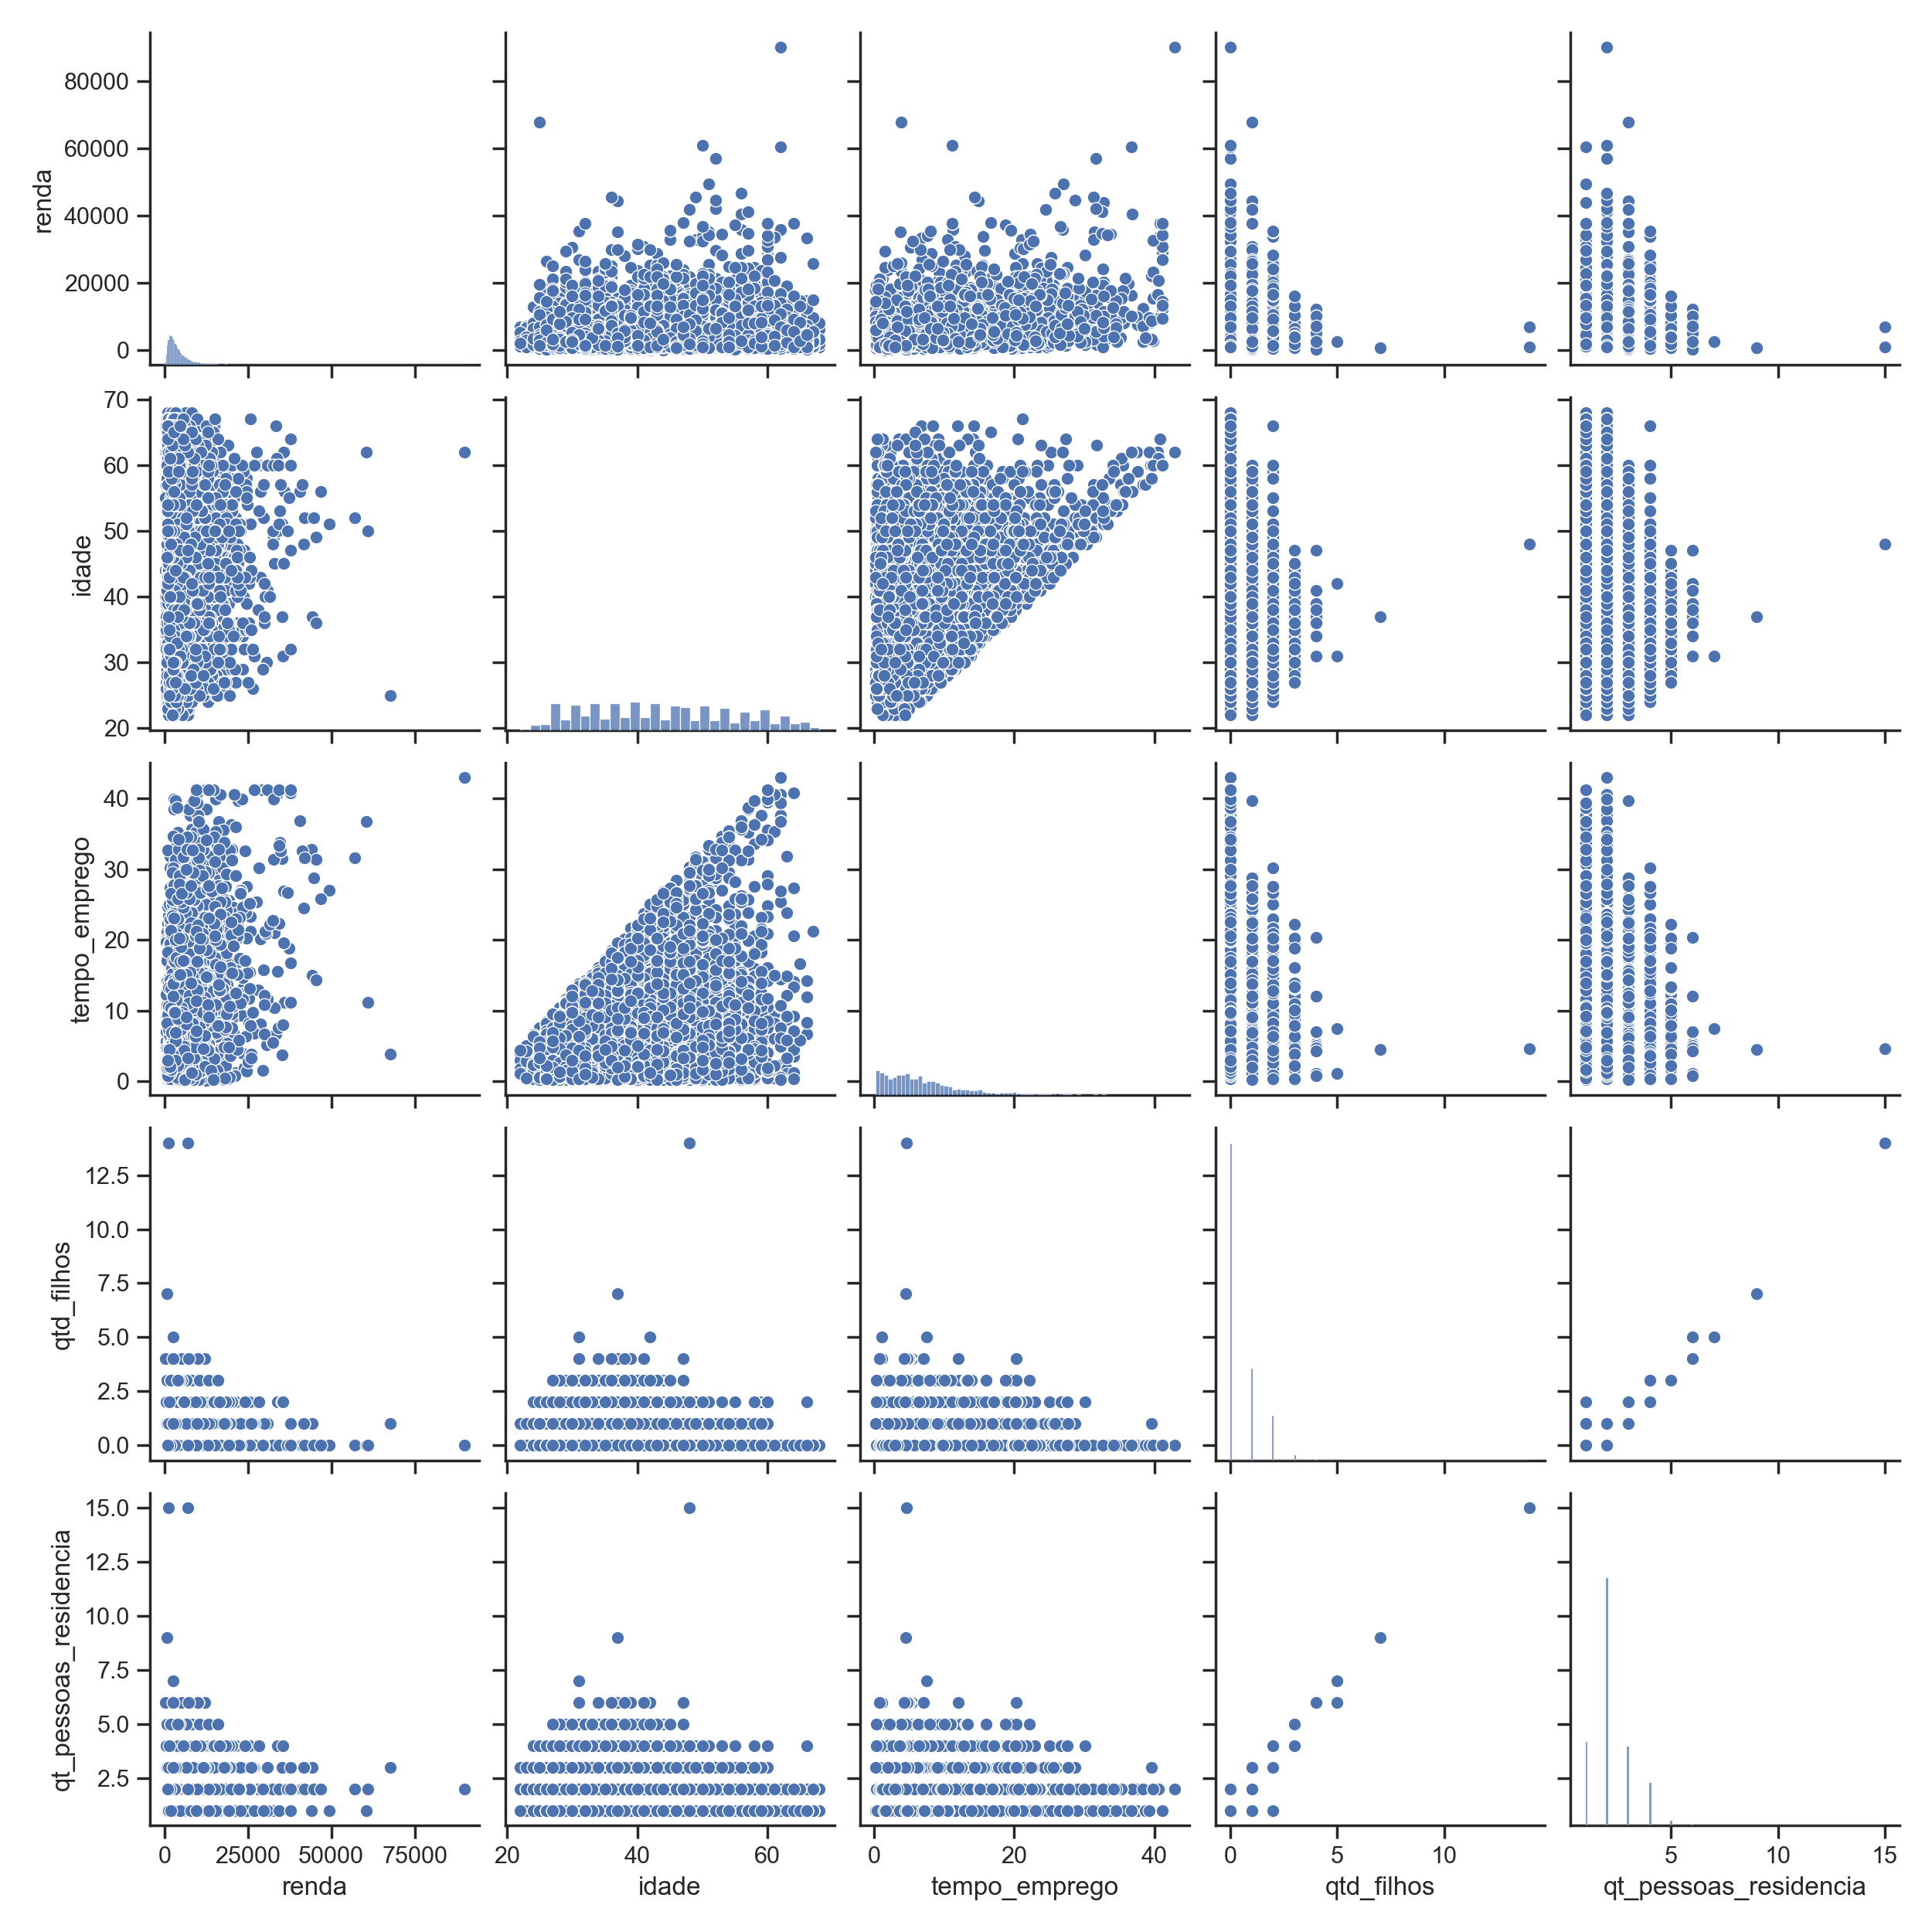

<IPython.core.display.Javascript object>


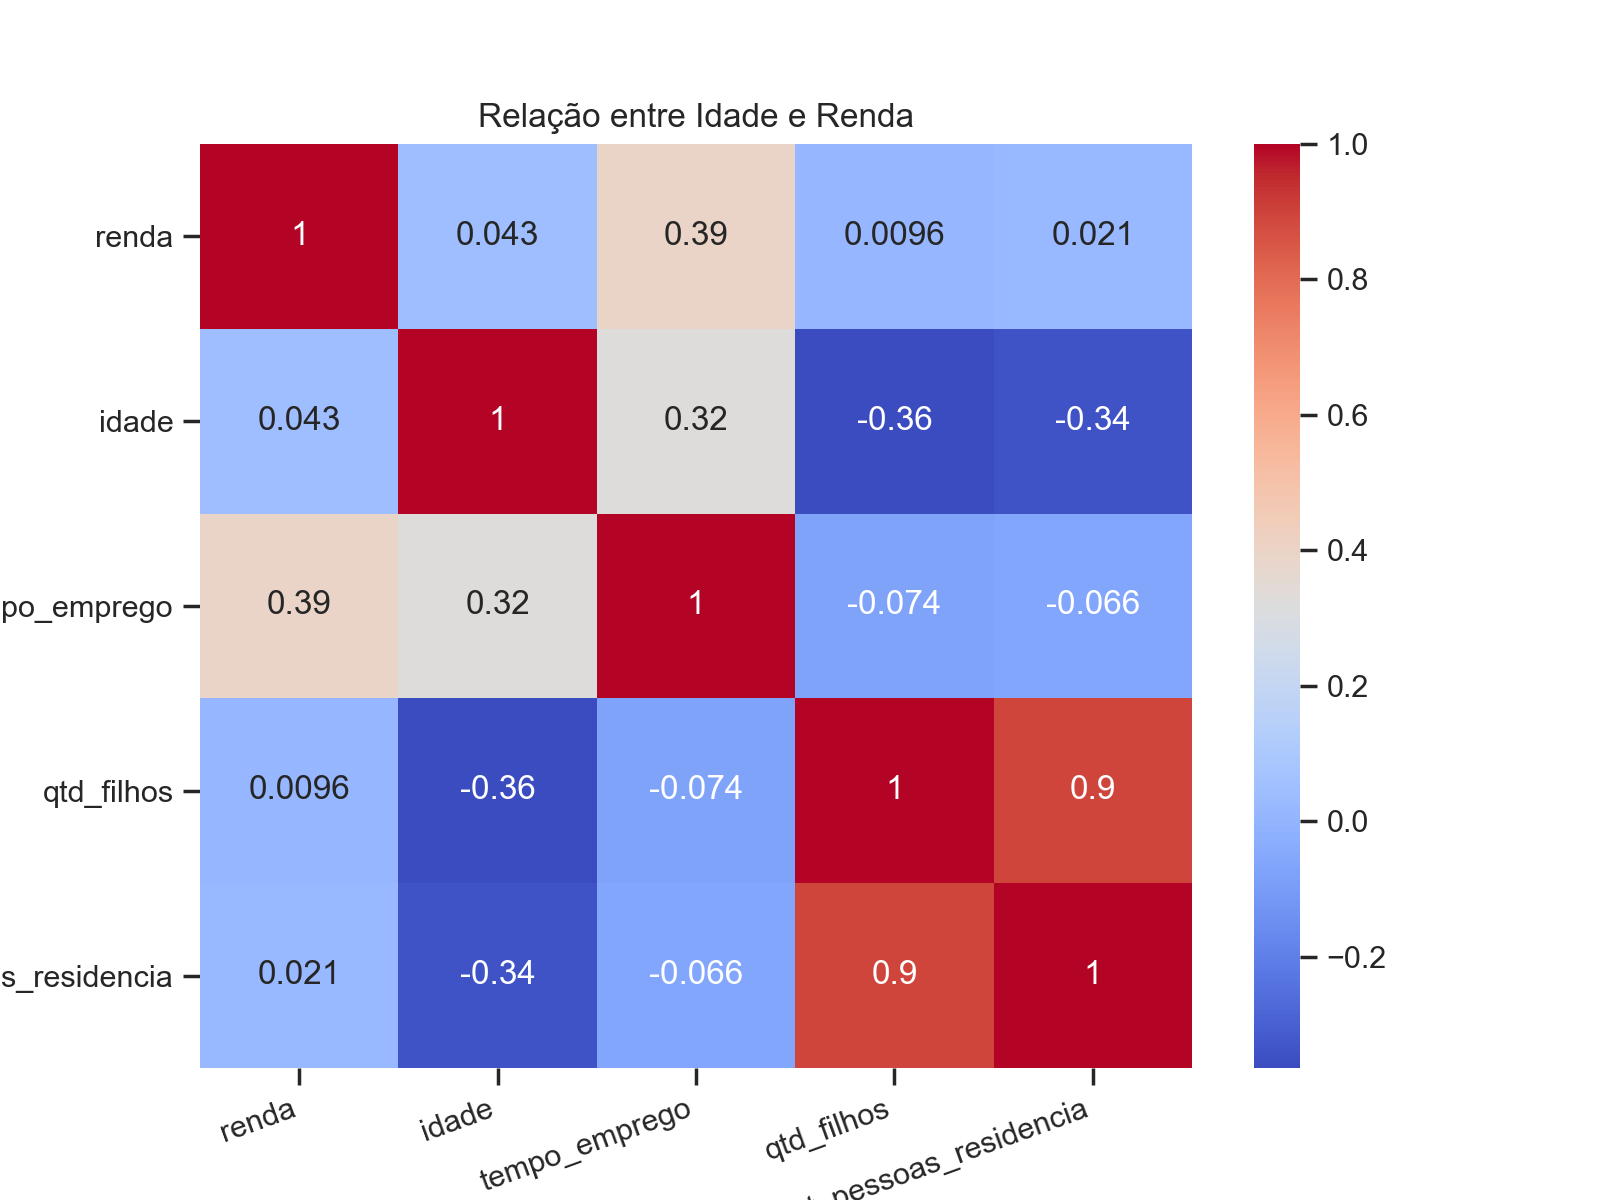

In [58]:
variaveis_quantitativas = ['renda', 'idade', 'tempo_emprego', 'qtd_filhos', 'qt_pessoas_residencia']
dados_quantitativos = data[variaveis_quantitativas]

# Matriz de dispersão
sns.set(style='ticks')
sns.pairplot(dados_quantitativos)
plt.show()

# Matriz de correlações
matriz_correlacoes = dados_quantitativos.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(matriz_correlacoes, annot=True, cmap='coolwarm')
plt.xticks(rotation=20, ha='right')
plt.title('Matriz de Correlações')
plt.show()

In [60]:
variaveis_quantitativas = ['renda', 'idade', 'tempo_emprego', 'qtd_filhos', 'qt_pessoas_residencia']
dados_quantitativos = data[variaveis_quantitativas]

# Calcular a matriz de correlações
matriz_correlacoes = dados_quantitativos.corr()

# Exibir a matriz de correlações em formato de texto
matriz_correlacoes

,renda,idade,tempo_emprego,qtd_filhos,qt_pessoas_residencia
renda,1.000000,0.042570,0.394235,0.009567,0.020977
idade,0.042570,1.000000,0.323934,-0.364303,-0.338805
tempo_emprego,0.394235,0.323934,1.000000,-0.074250,-0.065748
qtd_filhos,0.009567,-0.364303,-0.074250,1.000000,0.896488
qt_pessoas_residencia,0.020977,-0.338805,-0.065748,0.896488,1.000000


Alguns insights que podemos ter são os seguintes:

- Há uma relação entre renda e tempo de emprego. Em geral, quanto maior o tempo de emprego, maior tende a ser a renda (o que reflete em geral o que ocorre de fato na vida prática, já que é comum as pessoas ganharem mais à medida que ganham experiência e progridem em suas carreiras)
- Não há muita relação entre renda e idade, ou seja, o fator idade por si só não determina o quanto uma pessoa pode ganhar; outros fatores são mais determinantes, como tempo de emprego, já que alguém com mais idade pode ter acabado de passar por uma transição de carreira e estar há pouco tempo em um novo emprego, o que geralmente indica uma renda menor.
- Ao contrário do que ocorre no item anterior sobre renda e idade, quando observamos as variáveis idade e tempo de emprego já existe uma correlação maior: em geral, quanto maior a idade, maior é o tempo de emprego.

2) Avalie um gráfico de dispersão (*scatterplot*) específico para as duas variáveis mais correlacionadas com *renda*.

In [61]:
renda = data['renda']
idade = data['idade']

plt.scatter(idade, renda)
plt.xlabel('Idade')
plt.ylabel('Renda')
plt.title('Relação entre Idade e Renda')
plt.show()

In [68]:
faixa_idades = pd.cut(data['idade'], bins=[0, 20, 30, 40, 50, 60, 70, 100])
media_renda_por_idade = data.groupby(faixa_idades)['renda'].mean()

for faixa, media_renda in media_renda_por_idade.items():
    print(f"Faixa de idades: {faixa}")
    print(f"Média de renda: {media_renda}\n")

Faixa de idades: (0, 20]
Média de renda: nan

Faixa de idades: (20, 30]
Média de renda: 4038.3880418251

Faixa de idades: (30, 40]
Média de renda: 4407.7202434542905

Faixa de idades: (40, 50]
Média de renda: 5027.37684969635

Faixa de idades: (50, 60]
Média de renda: 5028.255629159108

Faixa de idades: (60, 70]
Média de renda: 4041.982390965729

Faixa de idades: (70, 100]
Média de renda: nan



A partir do gráfico de dispersão, é possível obter alguns insights como o fato de a renda média na faixa de 20 a 30 anos em geral ser menor, o que pode se justificar por ser uma faixa de idade em início de carreira. Até os 40 anos, a renda tende a aumentar e a partir dessa faixa ela se estabiliza, indicando profissionais que estão no auge da carreira.

3) Na su aopinião, há outliers na variável renda?

<IPython.core.display.Javascript object>


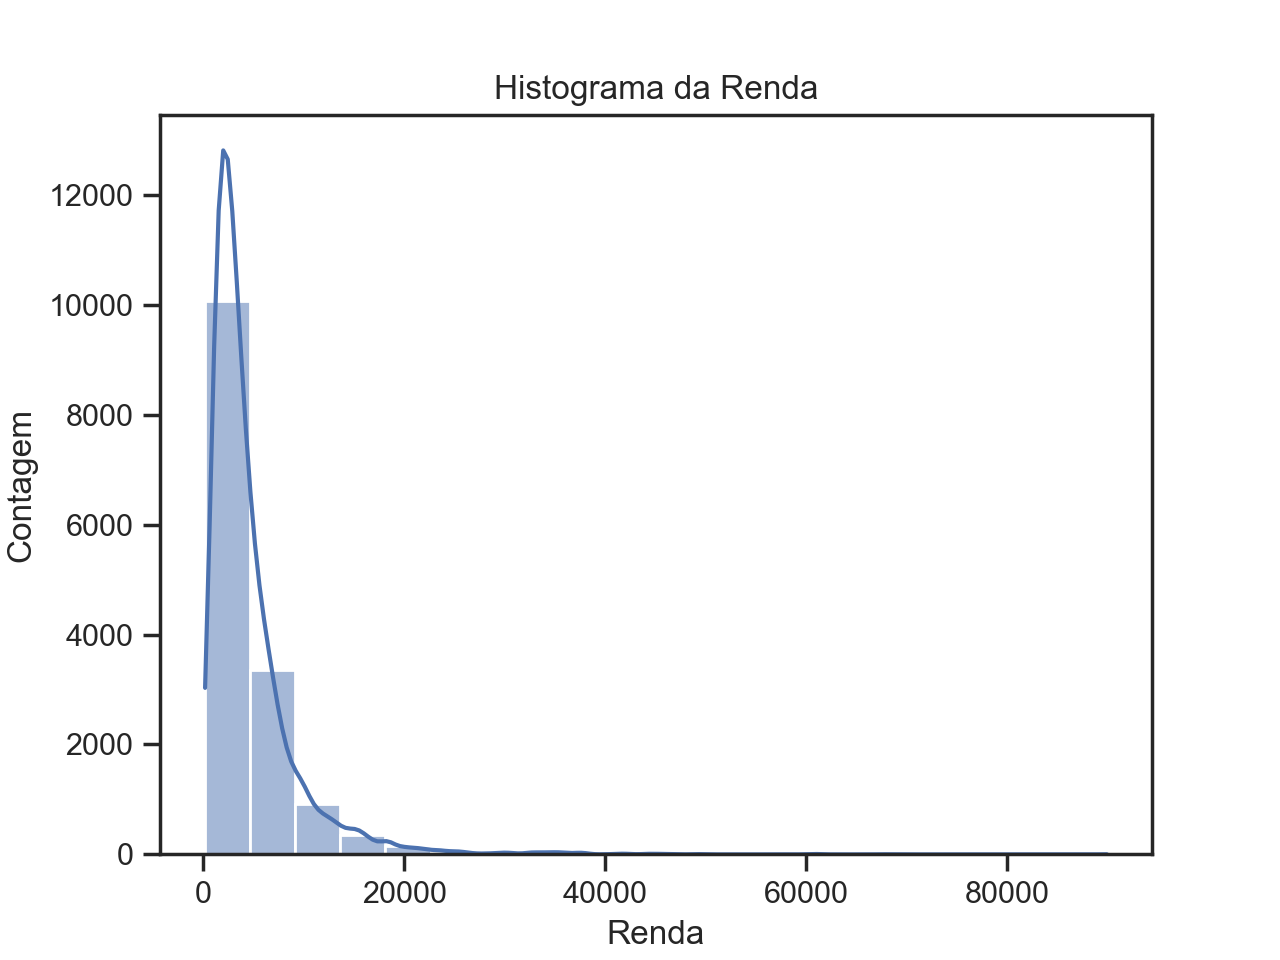

<IPython.core.display.Javascript object>


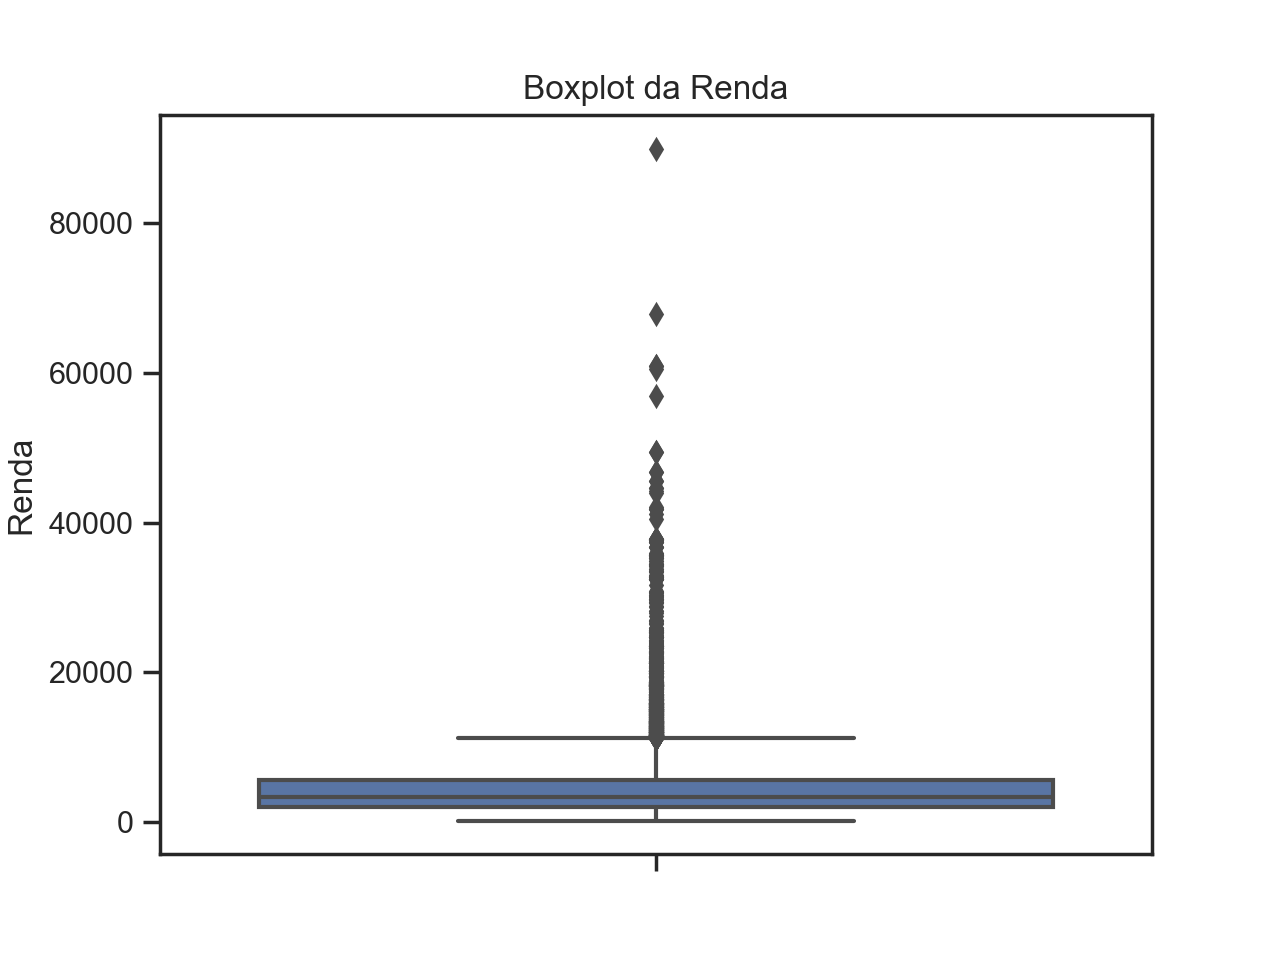

In [62]:
# Histograma
plt.figure()
sns.histplot(data=data, x='renda', bins=20, kde=True)
plt.title('Histograma da Renda')
plt.xlabel('Renda')
plt.ylabel('Contagem')
plt.show()

# Boxplot
plt.figure()
sns.boxplot(y='renda', data=data)
plt.title('Boxplot da Renda')
plt.ylabel('Renda')
plt.show()

In [44]:
# Dados do histograma

histogram = data['renda'].value_counts(bins=20, sort=False)
histogram_df = pd.DataFrame({'Bins': histogram.index.mid, 'Count': histogram.values})

print(histogram_df)

          Bins  Count
0    2358.9740  10071
1    6891.7605   3350
2   11379.6675    923
3   15867.5745    353
4   20355.4815    153
5   24843.3885     57
6   29331.2955     21
7   33819.2025     37
8   38307.1095     14
9   42795.0165      9
10  47282.9235      6
11  51770.8305      0
12  56258.7375      1
13  60746.6445      3
14  65234.5515      0
15  69722.4585      1
16  74210.3655      0
17  78698.2725      0
18  83186.1795      0
19  87674.0865      1


In [63]:
# Estatísticas do boxplot

boxplot_stats = data['renda'].describe()

print(boxplot_stats)

count    15000.000000
mean      4624.632946
std       4628.571729
min        159.900000
25%       1945.740000
50%       3278.260000
75%       5642.365000
max      89918.040000
Name: renda, dtype: float64


Com base nos resultados fornecidos, podemos observar que o valor máximo da variável 'renda' é de 89918.04, enquanto o terceiro quartil (75%) é de 5642.37. Essa diferença considerável entre esses dois valores sugere a presença de outliers na variável renda.

Além disso, o histograma mostra que a contagem de valores diminui rapidamente à medida que a renda aumenta, indicando uma distribuição assimétrica e possíveis valores discrepantes nas faixas de renda mais altas.

4) Calcule o logaritmo da variável renda e repita a sequência de análise

<IPython.core.display.Javascript object>


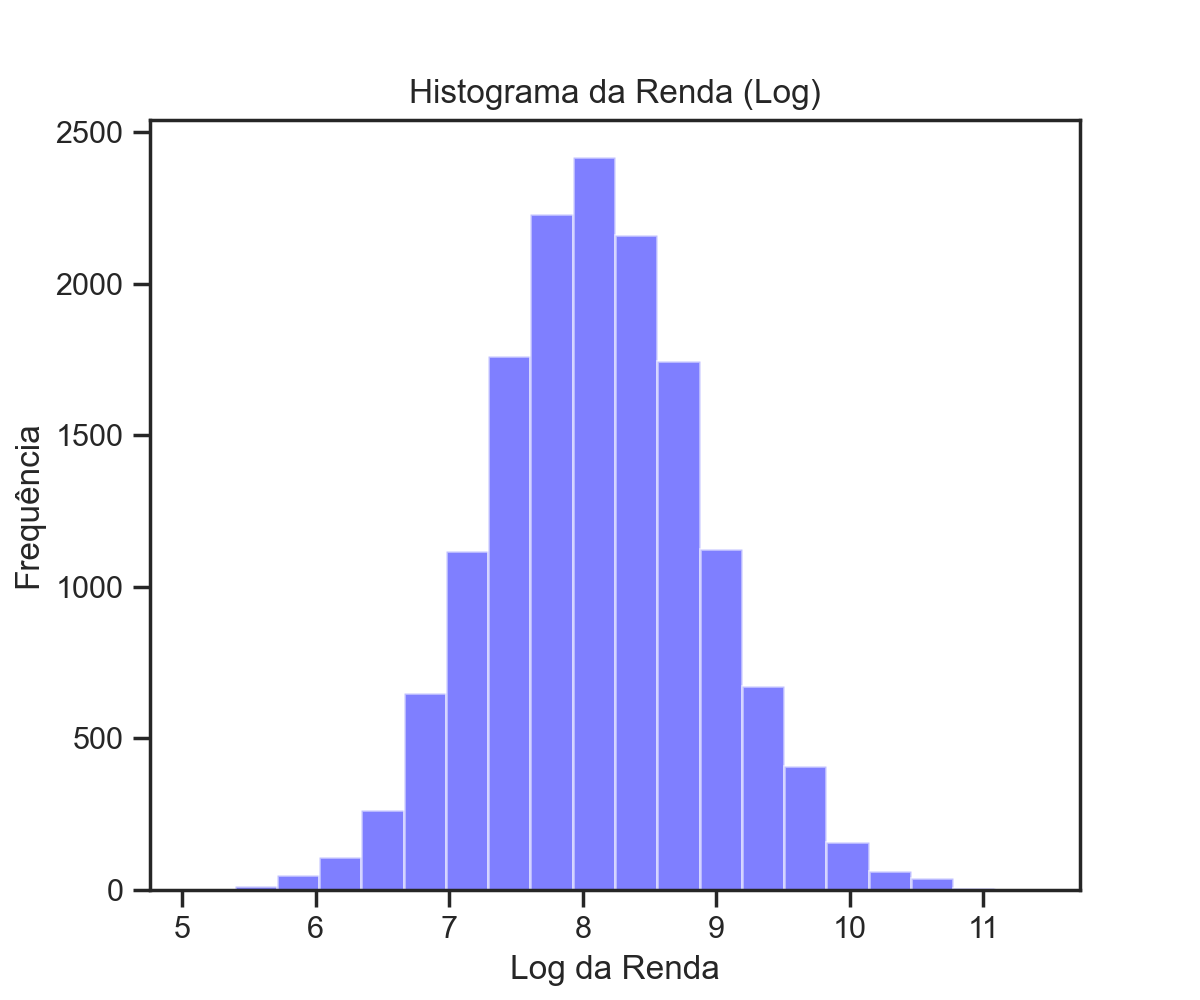

<IPython.core.display.Javascript object>


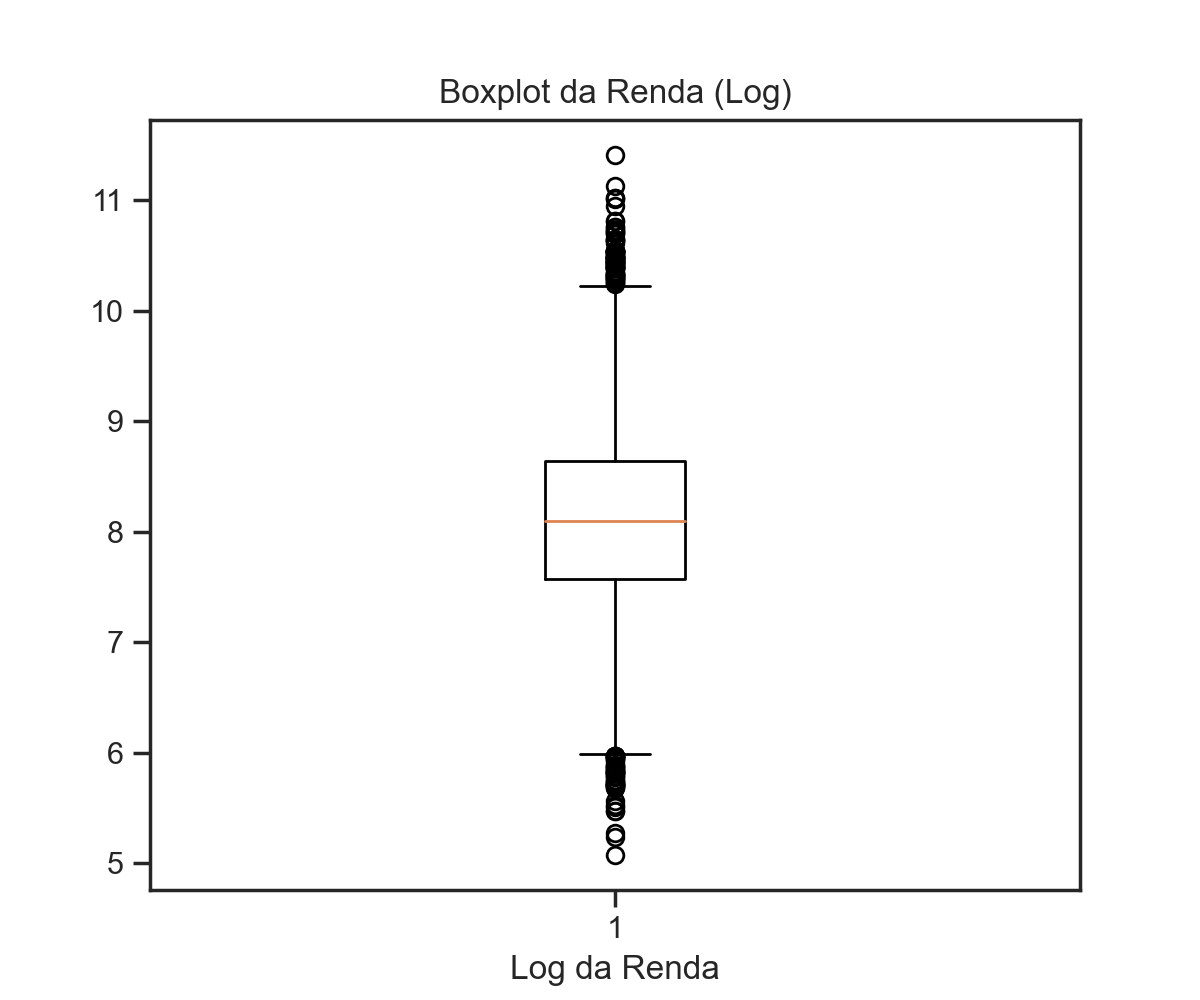

In [70]:
# Histograma
plt.figure(figsize=(6, 5))
plt.hist(log_renda, bins=20, color='blue', alpha=0.5)
plt.xlabel('Log da Renda')
plt.ylabel('Frequência')
plt.title('Histograma da Renda (Log)')
plt.show()

# Boxplot
plt.figure(figsize=(6, 5))
plt.boxplot(log_renda)
plt.xlabel('Log da Renda')
plt.title('Boxplot da Renda (Log)')
plt.show()

In [48]:
log_renda.describe()

count    15000.000000
mean         8.111047
std          0.797451
min          5.074549
25%          7.573398
50%          8.095068
75%          8.638059
max         11.406654
Name: renda, dtype: float64

- A distribuição do logaritmo da renda parece ser aproximadamente simétrica, uma vez que a média e a mediana estão próximas. Isso sugere que a transformação logarítmica pode ter ajudado a reduzir a assimetria dos dados originais.

- O desvio padrão de aproximadamente 0.80 indica uma dispersão moderada dos dados ao redor da média.

- É possível observar uma redução na magnitude dos valores extremos (outliers) em comparação com os dados originais da renda. Isso pode ser útil para análises estatísticas que são sensíveis a valores extremos

5) A aplicação do LOG você acha que melhorou ou piorou a análise?

Acredito que pode ter ajudado a melhorar a análise, pois a aplicação do LOG trouxe alguns impactos positivos, como:

- A aplicação do logaritmo pode ajudar a tornar a distribuição da variável "renda" mais próxima de uma distribuição normal.
- Houve uma redução dos valores extremos (outliers), que poderiam distorcer as estatísticas e prejudicar a interpretação dos dados.
- As relações não lineares entre algumas variáveis podem ficar próximas de um resultado mais linear, o que pode ser útil para análises de regressão, por exemplo, onde a relação entre a variável resposta e as variáveis explicativas pode ser aproximada por uma função linear após a transformação.